In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
	df[s] = mk.get_daily_price(s, '2019-06-05', '2021-08-27')['close']

In [4]:
print(df)

             삼성전자  SK하이닉스   현대자동차   NAVER
date                                     
2019-06-05  43900   65100  141000  110500
2019-06-07  44200   65400  140000  111000
2019-06-10  44800   66800  143000  114000
2019-06-11  44850   67200  143500  113000
2019-06-12  44600   65700  141000  114000
...           ...     ...     ...     ...
2021-08-23  73300  103000  204000  429500
2021-08-24  75600  105000  209500  437500
2021-08-25  75700  103500  209500  430500
2021-08-26  74600  104000  210000  423500
2021-08-27  74300  103500  208500  420000

[554 rows x 4 columns]


In [5]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

In [6]:
daily_ret

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2019-06-05,NaN,NaN,NaN,NaN
2019-06-07,0.006834,0.004608,-0.007092,0.004525
2019-06-10,0.013575,0.021407,0.021429,0.027027
2019-06-11,0.001116,0.005988,0.003497,-0.008772
2019-06-12,-0.005574,-0.022321,-0.017422,0.008850
...,...,...,...,...
2021-08-23,0.008253,0.004878,0.012407,0.016568
2021-08-24,0.031378,0.019417,0.026961,0.018626
2021-08-25,0.001323,-0.014286,0.000000,-0.016000


In [7]:
annual_ret

삼성전자      0.277374
SK하이닉스    0.283670
현대자동차     0.260144
NAVER     0.675894
dtype: float64

In [8]:
daily_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.000300,0.000302,0.000240,0.000135
SK하이닉스,0.000302,0.000579,0.000260,0.000186
현대자동차,0.000240,0.000260,0.000668,0.000160
NAVER,0.000135,0.000186,0.000160,0.000538


In [9]:
annual_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.075576,0.075979,0.060433,0.033936
SK하이닉스,0.075979,0.145964,0.065539,0.046957
현대자동차,0.060433,0.065539,0.168278,0.040317
NAVER,0.033936,0.046957,0.040317,0.135531


In [10]:
port_ret = []
port_risk = []
port_weights = []

In [13]:
for _ in range(20000):
	weights = np.random.random(len(stocks))
	weights /= np.sum(weights)

	returns = np.dot(weights, annual_ret)
	risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

	port_ret.append(returns)
	port_risk.append(risk)
	port_weights.append(weights)

portfolio = {'Returns':port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
	portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [14]:
weights

array([0.36886363, 0.048376  , 0.38648617, 0.1962742 ])

In [15]:
portfolio

{'Returns': [0.3758004995426745,
  0.34406017393215615,
  0.4310491722521512,
  0.29930445545309975,
  0.404602069088449,
  0.38019535886964007,
  0.3834998762102154,
  0.36204016605763656,
  0.3769219891525082,
  0.4333376681951647,
  0.38994993775873,
  0.380839402185822,
  0.3515004437014538,
  0.2770227069993552,
  0.3736957553772197,
  0.47658198495485526,
  0.37587704493618185,
  0.41488692632058144,
  0.4095897577153082,
  0.3588719085930805,
  0.4723823584481324,
  0.3860144957079889,
  0.3756152516658132,
  0.4013033392153611,
  0.3646775756523313,
  0.35741815132269905,
  0.35997145106302575,
  0.40136931255682,
  0.273054082733127,
  0.35171015072555323,
  0.41180309421010897,
  0.3488165667291072,
  0.43356475565233177,
  0.33077980186453737,
  0.4362136483689381,
  0.3401961912965455,
  0.37167672792193573,
  0.44376654151414296,
  0.37094099135099873,
  0.35877746642385755,
  0.3503586313629975,
  0.2881264592837714,
  0.3492747360052745,
  0.357137294930167,
  0.35761151

In [16]:
df

,Returns,Risk,삼성전자,SK하이닉스,현대자동차,NAVER
0,0.375800,0.271260,0.364238,0.338567,0.053261,0.243934
1,0.344060,0.311440,0.102543,0.640373,0.095728,0.161356
2,0.431049,0.288396,0.069369,0.440182,0.107156,0.383293
3,0.299304,0.276474,0.544365,0.032590,0.353256,0.069788
4,0.404602,0.260097,0.355708,0.109266,0.208487,0.326539
...,...,...,...,...,...,...
19995,0.298624,0.301332,0.170620,0.388217,0.377647,0.063517
19996,0.415176,0.291353,0.174249,0.487584,0.000083,0.338084
19997,0.451561,0.286564,0.077477,0.104467,0.366765,0.451290
19998,0.399462,0.300907,0.111113,0.025955,0.533905,0.329027


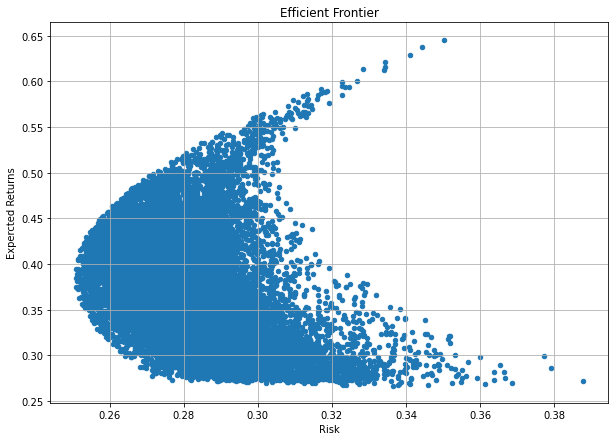

In [17]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()